# Project 3: A/B Testing Dataset

Name: Sapir Horoszowski  
Month Submitted: February 2025  
Source: https://tinyurl.com/2fk45nkf

As a former marketing manager, I now have the opportunity to analyze campaign data in-depth. For this project, I’ve chosen to work with an A/B testing dataset, which allows me to compare two datasets and decide whether to merge them or concatenate them. The project consists of two groups (tables): control and test, with the Date column being the only common link between them. Over 30 days, each day features two campaign versions with one different variable, yielding different results.

It would be beneficial to note some terms before analyzing:  
- A/B Testing: A/B testing, or split testing, involves showing different versions of a variable to separate website visitor groups simultaneously to determine which version drives the best business results  
- CTR (Click-Through Rate): Measures the percentage of visitors who click on a link. The way to caculate CTR is: (clicks/impressions)*100  
- CPC (Cost Per Click): The amount spent per click. The way to caculate CPC is: total spend/total clicks  
- CPA (Cost Per Acquisition): The cost for acquiring a customer or conversion. The way to caculate CPA is: total spend/number of conversions
- CR (Conversion Rate): The percentage of users who complete a desired action after clicking on an ad. It measures how effective the campaign is at driving conversions. The way to caculate CR is: (Number of conversions/total website clicks)*100  

In this project I will address few quesions:
- What version delivers the best business outcome for the control group and the test group?
- How does the test group compare to the control group in terms of key metrics (e.g., conversion rate, engagement, revenue)?
- Is there a statistically significant difference between the test and control groups?

Explanation of each column in the tables:  
- Campaign Name – Title of the marketing campaign  
- Date – The specific day the data was recorded  
- Spend – Total money spent on the campaign (in dollars)  
- Impressions – Total times the ad was displayed  
- Reach – Number of unique users who saw the ad  
- Website Clicks – Count of clicks leading to the website  
- Searches – Users who searched for something on the site  
- View Content – Users who viewed product pages  
- Add to Cart – Users who added items to their cart  
- Purchase – Total number of completed purchases  

In [1]:
#Importing all the relevant libraries
#After that, I will be displaying the directory path 
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
pwd

'C:\\Users\\USER\\Desktop\\דאטה אנליסט\\pandas'

In [3]:
#loading two tables, one represents the control group and the other one represents the test group
#The ';' sign is the files's seperator, hence I used "sep=';'" in the brackets
df_control = pd.read_csv('project/control_group.csv', sep=';')
df_test = pd.read_csv('project/test_group.csv', sep=';')

In [4]:
#Having a first glance on the table
df_control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#One of the most important things is checking the info - seeing how many columns, nulls, non-nulls I've got to work with
#Pointing out that there is 30 rows in this table, and there are few columns with missing values, I will check later on if it happens only on one row or more
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [6]:
#Having a first glance on the table
df_test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [7]:
#One of the most important things is checking the info - seeing how many columns, nulls, non-nulls I've got to work with
#It seems like that this dataset is full of data, with no nulls
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [8]:
#One of the first must-do things, is to convert the Date column type from object to datetime
df_control["Date"]=pd.to_datetime(df_control["Date"], format="%d.%m.%Y")
df_test["Date"]=pd.to_datetime(df_test["Date"], format="%d.%m.%Y")

In [9]:
#The current names aren't as clear as I think they should be. that's why I've changed them to be more readable
df_control.rename(columns={"Spend [USD]":"Spend($)",
                           "# of Impressions":"Total_Impressions",
                           "Reach":"Total_UniqueImpressions",
                           "# of Website Clicks":"Total_Clicks",
                           "# of Searches":"Total_Searches",
                           "# of View Content":"Total_ViewContent",
                           "# of Add to Cart":"Total_AddToCart",
                           "# of Purchase":"Total_Purchase"}, inplace=True)

In [10]:
df_test.rename(columns={"Spend [USD]":"Spend($)",
                        "# of Impressions":"Total_Impressions",
                        "Reach":"Total_UniqueImpressions",
                        "# of Website Clicks":"Total_Clicks",
                        "# of Searches":"Total_Searches",
                        "# of View Content":"Total_ViewContent",
                        "# of Add to Cart":"Total_AddToCart",
                        "# of Purchase":"Total_Purchase"}, inplace=True)

In [11]:
#Previously, we've seen that there is some missing values in the df_control table
#Im creating here a new variable called null_control, using it to try find the relevent empty values in different rows
#It seems like there is only one row with null values
null_control=df_control.isna()
df_control[null_control.any(axis=1)]

,Campaign Name,Date,Spend($),Total_Impressions,Total_UniqueImpressions,Total_Clicks,Total_Searches,Total_ViewContent,Total_AddToCart,Total_Purchase
4,Control Campaign,2019-08-05,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Here I'm changing the null values to the number 0, in the location of index 4
#If I would have changed the null values to zero, it would affect the data I have - considering I've got a small amount of data to work with on this project.
#For example, the min value would be 0 and it would affect the mean profoundly.
df_control.loc[4] = df_control.loc[4].fillna(df_control.mean(numeric_only=True))

In [13]:
#Checking if the changes are saved
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Campaign Name            30 non-null     object        
 1   Date                     30 non-null     datetime64[ns]
 2   Spend($)                 30 non-null     int64         
 3   Total_Impressions        30 non-null     float64       
 4   Total_UniqueImpressions  30 non-null     float64       
 5   Total_Clicks             30 non-null     float64       
 6   Total_Searches           30 non-null     float64       
 7   Total_ViewContent        30 non-null     float64       
 8   Total_AddToCart          30 non-null     float64       
 9   Total_Purchase           30 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.5+ KB


In [14]:
#Checking if the changes are saved
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Campaign Name            30 non-null     object        
 1   Date                     30 non-null     datetime64[ns]
 2   Spend($)                 30 non-null     int64         
 3   Total_Impressions        30 non-null     int64         
 4   Total_UniqueImpressions  30 non-null     int64         
 5   Total_Clicks             30 non-null     int64         
 6   Total_Searches           30 non-null     int64         
 7   Total_ViewContent        30 non-null     int64         
 8   Total_AddToCart          30 non-null     int64         
 9   Total_Purchase           30 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 2.5+ KB


In [15]:
#Here I'm merging both tables, as mentioned: the common link between them are the 'Date' column
df_mrg=pd.merge(df_control,
                df_test,
                on='Date',
                how='inner')

In [16]:
#Here I'm creating a new column that represents day names, it will help me analayze categorically
df_mrg.insert(2, "Day_Name", df_mrg["Date"].dt.day_name())

In [17]:
#Here I'm having a first glance on the new dataframe I've created, after merging both dfs
df_mrg.head()

,Campaign Name_x,Date,Day_Name,Spend($)_x,Total_Impressions_x,Total_UniqueImpressions_x,Total_Clicks_x,Total_Searches_x,Total_ViewContent_x,Total_AddToCart_x,Total_Purchase_x,Campaign Name_y,Spend($)_y,Total_Impressions_y,Total_UniqueImpressions_y,Total_Clicks_y,Total_Searches_y,Total_ViewContent_y,Total_AddToCart_y,Total_Purchase_y
0,Control Campaign,2019-08-01,Thursday,2280,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000,Test Campaign,3008,39550,35820,3038,1946,1069,894,255
1,Control Campaign,2019-08-02,Friday,1757,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.0,511.000000,Test Campaign,2542,100719,91236,4657,2359,1548,879,677
2,Control Campaign,2019-08-03,Saturday,2343,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.0,372.000000,Test Campaign,2365,70263,45198,7885,2572,2367,1268,578
3,Control Campaign,2019-08-04,Sunday,1940,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.0,340.000000,Test Campaign,2710,78451,25937,4216,2216,1437,566,340
4,Control Campaign,2019-08-05,Monday,1835,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.0,522.793103,Test Campaign,2297,114295,95138,5863,2106,858,956,768


In [18]:
#One of the most important things is checking the info - seeing how many columns, nulls, non-nulls I've got to work with
df_mrg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Campaign Name_x            30 non-null     object        
 1   Date                       30 non-null     datetime64[ns]
 2   Day_Name                   30 non-null     object        
 3   Spend($)_x                 30 non-null     int64         
 4   Total_Impressions_x        30 non-null     float64       
 5   Total_UniqueImpressions_x  30 non-null     float64       
 6   Total_Clicks_x             30 non-null     float64       
 7   Total_Searches_x           30 non-null     float64       
 8   Total_ViewContent_x        30 non-null     float64       
 9   Total_AddToCart_x          30 non-null     float64       
 10  Total_Purchase_x           30 non-null     float64       
 11  Campaign Name_y            30 non-null     object        
 12  Spend($)_y

In [19]:
df_mrg.describe()

,Date,Spend($)_x,Total_Impressions_x,Total_UniqueImpressions_x,Total_Clicks_x,Total_Searches_x,Total_ViewContent_x,Total_AddToCart_x,Total_Purchase_x,Spend($)_y,Total_Impressions_y,Total_UniqueImpressions_y,Total_Clicks_y,Total_Searches_y,Total_ViewContent_y,Total_AddToCart_y,Total_Purchase_y
count,30,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2019-08-15 12:00:00,2288.433333,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
min,2019-08-01 00:00:00,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2019-08-08 06:00:00,1945.500000,95191.250000,75300.250000,4122.250000,1629.250000,1249.000000,942.500000,375.500000,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2019-08-15 12:00:00,2299.500000,112368.000000,91418.000000,5272.396552,2340.000000,1979.500000,1319.500000,506.000000,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2019-08-22 18:00:00,2532.000000,121259.000000,101958.750000,6609.500000,2655.000000,2360.500000,1638.000000,663.250000,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,2019-08-30 00:00:00,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000
std,NaN,367.334451,21311.695472,21452.627592,1726.803732,851.025795,764.021907,400.371207,181.810508,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745


### A quick analysis:
- The test group has a higher average spend 2563.07 dollars than the control group 2288.43 dollars
- The range (min-max) of spend is slightly higher in the test group
- The test group has a higher average number of website clicks (6,032 vs. 5,320 in the control). However, the test group has fewer View Content, Add to Cart, and Purchases on average than the control, suggesting a possible decrease in engagement further down the funnel
- The dataset only covers 30 days, meaning daily fluctuations can strongly influence the results. If we had data from a longer period (e.g., several months), the average values would likely stabilize, and the std might decrease  

In [20]:
#Here I'm creating a new variable, a series that shows the sum of each column in the df_control dataframe
df_control_sum=df_control.sum(numeric_only=True).astype(int)
df_control_sum

Spend($)                     68653
Total_Impressions          3286792
Total_UniqueImpressions    2665347
Total_Clicks                159623
Total_Searches               66639
Total_ViewContent            58313
Total_AddToCart              39000
Total_Purchase               15683
dtype: int64

In [21]:
#Here I'm creating a new variable, a series that shows the sum of each column in the df_test dataframe
df_test_sum=df_test.sum(numeric_only=True).astype(int)
df_test_sum

Spend($)                     76892
Total_Impressions          2237544
Total_UniqueImpressions    1604747
Total_Clicks                180970
Total_Searches               72569
Total_ViewContent            55740
Total_AddToCart              26446
Total_Purchase               15637
dtype: int64

In [22]:
#Here I'm turning the series to dataframe type, also reseting the index to not be the metric column but being numerical
df_control_sum=df_control_sum.to_frame(name="Control_Sum").reset_index().rename(columns={"index": "Metric"})
df_control_sum

,Metric,Control_Sum
0,Spend($),68653
1,Total_Impressions,3286792
2,Total_UniqueImpressions,2665347
3,Total_Clicks,159623
4,Total_Searches,66639
5,Total_ViewContent,58313
6,Total_AddToCart,39000
7,Total_Purchase,15683


In [23]:
#Here I'm turning the series to dataframe type, also reseting the index to not be the metric column but being numerical
df_test_sum=df_test_sum.to_frame(name="Test_Sum").reset_index().rename(columns={"index": "Metric"})
df_test_sum

,Metric,Test_Sum
0,Spend($),76892
1,Total_Impressions,2237544
2,Total_UniqueImpressions,1604747
3,Total_Clicks,180970
4,Total_Searches,72569
5,Total_ViewContent,55740
6,Total_AddToCart,26446
7,Total_Purchase,15637


### A quick analysis:
- The test group spent ~$8,239 more (12% higher) than the control group
- Total Impressions at the test group are 2,237,544, while the control group have got 3,177,233 impressions, which is +42% compared to the test group
- Total Unique Impressions(TUI) at the test group are 180,970, while the control group have got 154,303 TUI. The test group got more clicks (+17.3%), which means it likely had a higher CTR (click-through rate)
- Total view content at the test group were 55,740, while the control group got 56,370 (Almost identical). The test group led to more searches but had no impact on content views - This might mean the audience in the test group was more active in search but not necessarily more interested in the content
- Add to cart at the test group was 26,446 whilst the control group was 37,700. The control group had a 42.5% higher add-to-cart rate, despite fewer clicks. This suggests that the control group was better at converting interest into purchase intent
- Total Purchases (Final Conversions), at the test group were 15,637, whilst at the control group was 15,161. The test group generated 3.1% more purchases (476 extra sales), but at a much higher spend

In [24]:
#Here i'm merging both recent dataframes I've created, it will be easier for me to compare them
#The common link between both dfs is the 'Metric' column
sum_merged = pd.merge(df_control_sum,
                       df_test_sum,
                       on='Metric',
                       how='inner')
sum_merged

,Metric,Control_Sum,Test_Sum
0,Spend($),68653,76892
1,Total_Impressions,3286792,2237544
2,Total_UniqueImpressions,2665347,1604747
3,Total_Clicks,159623,180970
4,Total_Searches,66639,72569
5,Total_ViewContent,58313,55740
6,Total_AddToCart,39000,26446
7,Total_Purchase,15683,15637


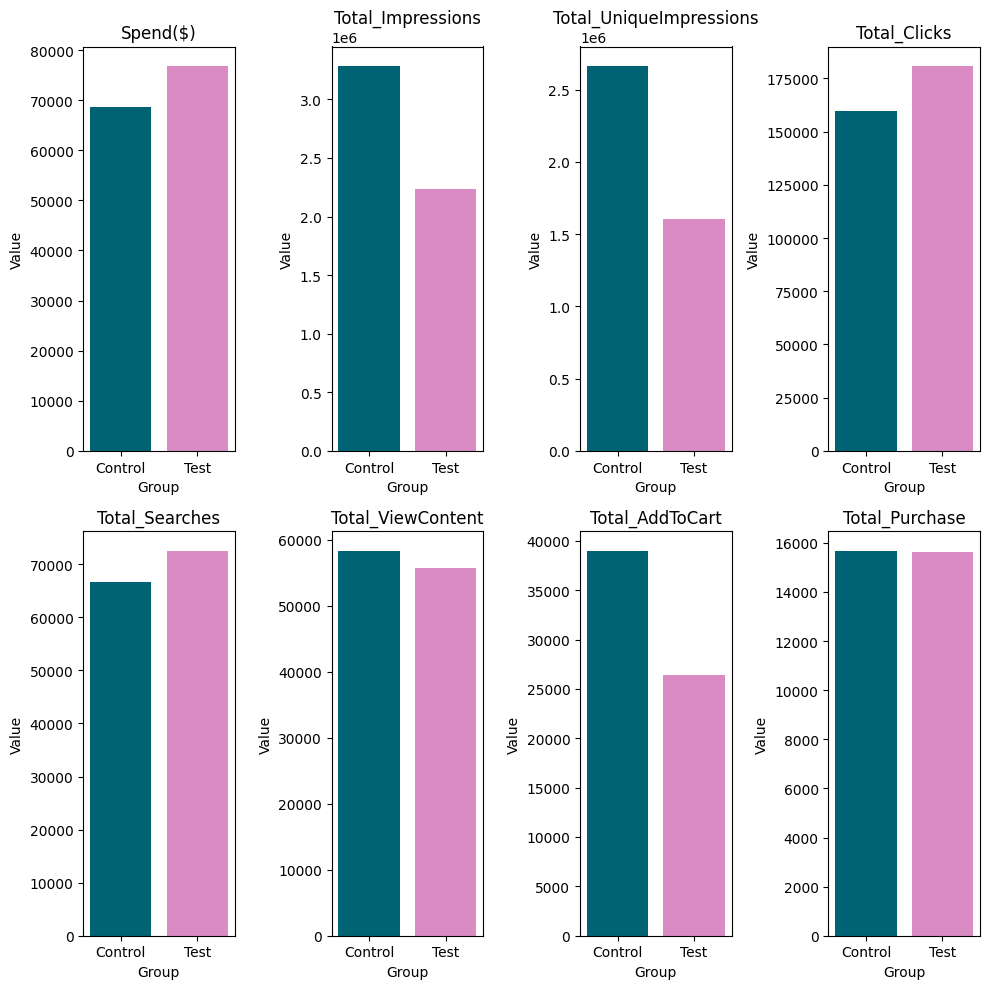

In [25]:
#Here i'm creating a subplotted visuals, showing all of the sum_merged metrics, comparing both groups - control and test
#First creating axes variable, containing the size of the visuals, showing I've chose to present 2 rows and 4 visuals on each row
#After that I'm flattening the axes, which means that I'm converting a multi-dimensional array into a 1D array, which will allows me to iterate through axes easily
#After that I'm using a for loop, that is iterating through different metrics in the sum_merged["Metric"] column and creating bar charts for each one

fig, axes = plt.subplots(2, 4, figsize=(10, 10))
axes = axes.flatten()

for i, metric in enumerate(sum_merged["Metric"]):
    axes[i].bar(["Control", "Test"],
                [sum_merged["Control_Sum"][i],
                sum_merged["Test_Sum"][i]],
                color=["#006374", "#da8bc3"])
    axes[i].set_title(metric)
    axes[i].set_ylabel("Value")
    axes[i].set_xlabel("Group")

plt.tight_layout()
plt.show()

### A quick analysis:
- The Control group outperformed the Test group in both Total Impressions (3,286,792 vs. 2,237,544) and Total Unique Impressions (2,665,347 vs. 1,604,747). This suggests that although the Test group spent more, the Control group was able to reach a wider audience or had a more efficient reach in terms of impressions  
- The Test group recorded more Total Clicks (180,970) than the Control group (159,623). This implies that although the Control group reached a larger audience, the Test group had more user interaction and was potentially more engaging or effective at encouraging click-throughs  
- The Test group slightly outperformed the Control group in Total Searches (72,569 vs. 66,639), while the Control group had a slightly higher Total View Content (58,313 vs. 55,740). These metrics are related to user interest, and while the Test group had a slightly higher level of interest (searches), the Control group had slightly more content views  
- The Control group significantly outperformed the Test group in Total Add to Cart (39,000 vs. 26,446). However, the Total Purchases in both groups are very similar (15,683 for Control vs. 15,637 for Test). Despite the Test group having fewer adds to cart, it managed to convert a similar number of users into purchases as the Control group  

- The CPC (Cost Per Click) in the test group was $0.4249 (Calculation: 76,892 / 180,970), while in the control group, it was $0.4449 (Calculation: 68,653 / 154,303). The test group had a slightly lower CPC, meaning clicks were cheaper
- The CPA (Cost Per Acquisition) in the test group was $4.92 (Calculation: 76,892 / 15,637), while the control group had a CPA of $4.53 (Calculation: 68,653 / 15,161). The test group paid more per purchase, making it less efficient at converting clicks into sales
- The CTR (Click-Through Rate) in the test group was 8.09% (Calculation: 180,970 / 2,237,544 × 100), while the control group had a 4.86% CTR (Calculation: 154,303 / 3,177,233 × 100). The test group had a significantly higher CTR, indicating that users were more likely to click on the ad
- The Conversion Rate in the test group was 8.64% (Calculation: 15,637 / 180,970 × 100), whereas the control group had a 9.83% conversion rate (Calculation: 15,161 / 154,303 × 100). The control group had a higher conversion rate, meaning a greater percentage of clicks turned into actual purchases

In [26]:
#Here I'm creating a new dataframe from scatch, using "fresh" new data I've caculated manually,
#Showing for each group what was their CPC, CPA, Conversion Rate and CTR
calculated_df = pd.DataFrame({
                            "Metric": ["CPC($)", "CPA($)", "Conversion Rate(%)", "CTR(%)"],
                            "Control Group": [0.4449, 4.53, 8.09, 8.64],
                            "Test Group": [0.4249, 4.92, 4.86, 9.83]
                            })
calculated_df

,Metric,Control Group,Test Group
0,CPC($),0.4449,0.4249
1,CPA($),4.5300,4.9200
2,Conversion Rate(%),8.0900,4.8600
3,CTR(%),8.6400,9.8300


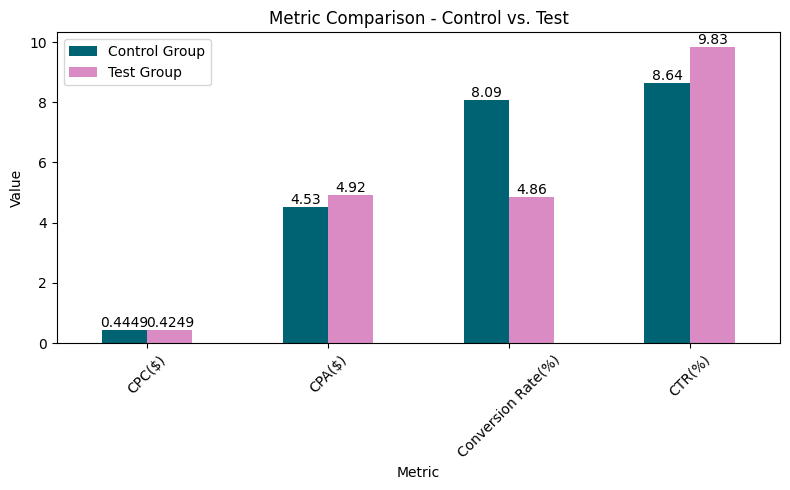

In [27]:
#This bar chart compares different metrics between two groups: Control vs. Test
#Each metric is displayed on the x-axis, while the corresponding values for both groups are shown as bars
#I've tried to show a direct comparison between this caculated information for each group
graph_2=calculated_df.set_index("Metric").plot(kind="bar", figsize=(8, 5), color=["#006374", "#da8bc3"])

plt.title("Metric Comparison - Control vs. Test")
plt.ylabel("Value")
plt.xlabel("Metric")
plt.xticks(rotation=45)

graph_2.bar_label(graph_2.containers[0])
graph_2.bar_label(graph_2.containers[1])
    
plt.tight_layout()
plt.show()

In [28]:
#Here I'm seeing which groups of day names I've got in the merged dataset
df_mrg.groupby("Day_Name").groups

{'Friday': [1, 8, 15, 22, 29], 'Monday': [4, 11, 18, 25], 'Saturday': [2, 9, 16, 23], 'Sunday': [3, 10, 17, 24], 'Thursday': [0, 7, 14, 21, 28], 'Tuesday': [5, 12, 19, 26], 'Wednesday': [6, 13, 20, 27]}

In [29]:
#Here I'm creating a new variable that is grouppong total purchases, parted by day names
Tot_Purch_ByWeekDay_X=df_mrg.groupby("Day_Name")["Total_Purchase_x"].mean().to_frame()

In [30]:
#Here I'm creating a new variable in order to reindex the Tot_Purch_ByWeekDay_X variable, so it won't be organized alphabetically, but by day numbers
weekday_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

Tot_Purch_ByWeekDay_X = Tot_Purch_ByWeekDay_X.reindex(weekday_order)
Tot_Purch_ByWeekDay_X

,Total_Purchase_x
Day_Name,
Sunday,361.000000
Monday,527.448276
Tuesday,608.500000
Wednesday,682.500000
Thursday,433.400000
Friday,577.200000
Saturday,478.250000


In [31]:
#Here I'm creating a new variable that is grouppong total purchases, parted by day names
Tot_Purch_ByWeekDay_Y=df_mrg.groupby("Day_Name")["Total_Purchase_y"].mean().to_frame()
Tot_Purch_ByWeekDay_Y

,Total_Purchase_y
Day_Name,
Friday,610.80
Monday,568.25
Saturday,340.00
Sunday,479.00
Thursday,407.40
Tuesday,700.25
Wednesday,549.00


In [32]:
#Here I'm updating the order through reindexing the Tot_Purch_ByWeekDay_Y variable, so it won't be organized alphabetically, but by day numbers
Tot_Purch_ByWeekDay_Y=Tot_Purch_ByWeekDay_Y.reindex(weekday_order)
Tot_Purch_ByWeekDay_Y

,Total_Purchase_y
Day_Name,
Sunday,479.00
Monday,568.25
Tuesday,700.25
Wednesday,549.00
Thursday,407.40
Friday,610.80
Saturday,340.00


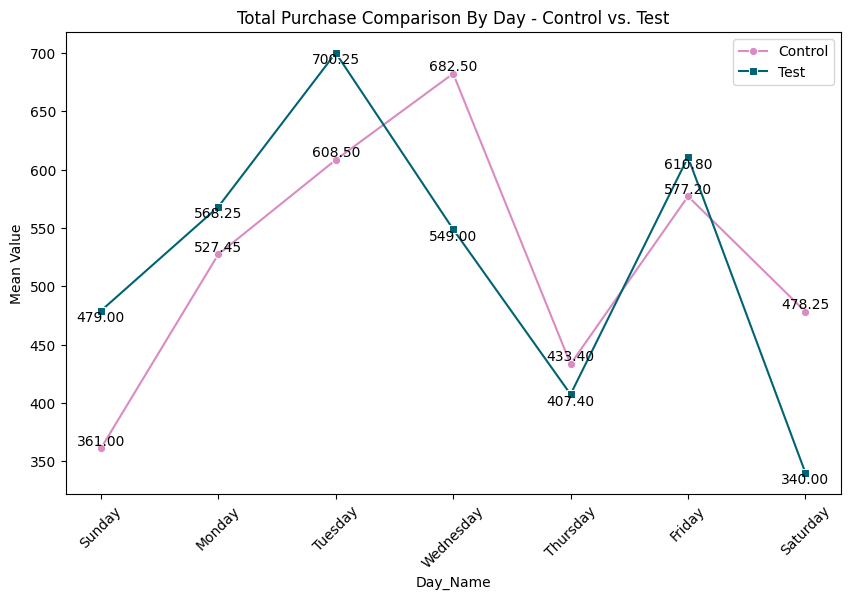

In [33]:
#Here I'm creating one graph showing two line plots of both groups, comparing the total purchases of each group by days
#The two 'for loops' are used to annotate the line plot with exact values for each day
plt.figure(figsize=(10, 6))
sb.lineplot(data=Tot_Purch_ByWeekDay_X, x="Day_Name", y="Total_Purchase_x", marker="o", label="Control", color="#da8bc3")
sb.lineplot(data=Tot_Purch_ByWeekDay_Y, x="Day_Name", y="Total_Purchase_y", marker="s", label="Test", color="#006374")

for i, value in enumerate(Tot_Purch_ByWeekDay_X["Total_Purchase_x"]):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10, color="black")

for i, value in enumerate(Tot_Purch_ByWeekDay_Y["Total_Purchase_y"]):
    plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontsize=10, color="black")
    
plt.title("Total Purchase Comparison By Day - Control vs. Test")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.legend()
plt.show()

### A quick analysis:

- The Test group’s total purchases are relatively higher across the majority of the week, with the highest total on Tuesday (700.25), followed by Monday (568.25) and Wednesday (549.00)  
- The Control group shows a similar trend but with lower total purchases on the same days  
- Friday and Saturday are exceptions where the Control group has higher total purchases compared to the Test group
- The Test group has a higher overall performance in total purchases, particularly in the middle of the week (Tuesday to Thursday)  
- The Control group shows strong performance on Friday and Saturday, but the Test group generally has higher purchases on other days, suggesting that the Test group might be more effective or have more purchases in the earlier part of the week  

In [34]:
#Here I'm creating two new variables, one for the control group (x), and on e for the test group (y),
#Showing the sum of the Total money spent on the campaign (in dollars)
spend_sum_x=df_mrg["Spend($)_x"].sum()
spend_sum_y=df_mrg["Spend($)_y"].sum()
print(f'The spend_sum_x is: {spend_sum_x}')
print(f'The spend_sum_y is: {spend_sum_y}')

The spend_sum_x is: 68653
The spend_sum_y is: 76892


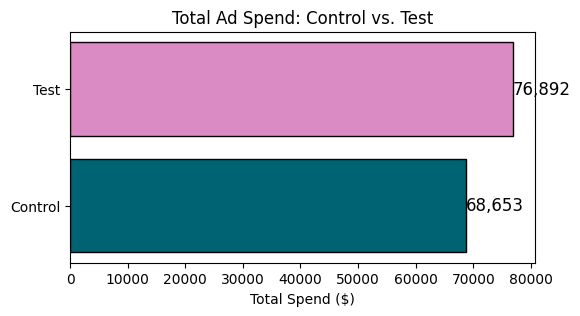

In [35]:
#In this bar chart, I'm comparing the total ad spend between two groups: Control and Test
#X-axis: Represents the total ad spend ($) for each group. Y-axis: Shows the two groups: Control and Test
#The for loop is used to annotate each bar with its exact value, ensuring that it will be easy to see the total spend for both groups at a glance

labels=["Control", "Test"]
values=[spend_sum_x, spend_sum_y]

plt.figure(figsize=(6, 3))
plt.barh(labels, values, color=["#006374", "#da8bc3"], edgecolor="black")

for i, v in enumerate(values):
    plt.text(v, i, f'{v:,.0f}', va='center', fontsize=12)

plt.xlabel("Total Spend ($)")
plt.title("Total Ad Spend: Control vs. Test")
plt.show()

### A quick analysis:
- The Test group has a higher total ad spend compared to the Control group  
- Specifically, the Test group spent $76,892, while the Control group spent $68,653
- The difference in ad spend between the two groups is $10,239, with the Test group spending approximately 14.9% more than the Control group
- A higher spend in the Test group may indicate either a larger budget allocation or increased investment in testing efforts

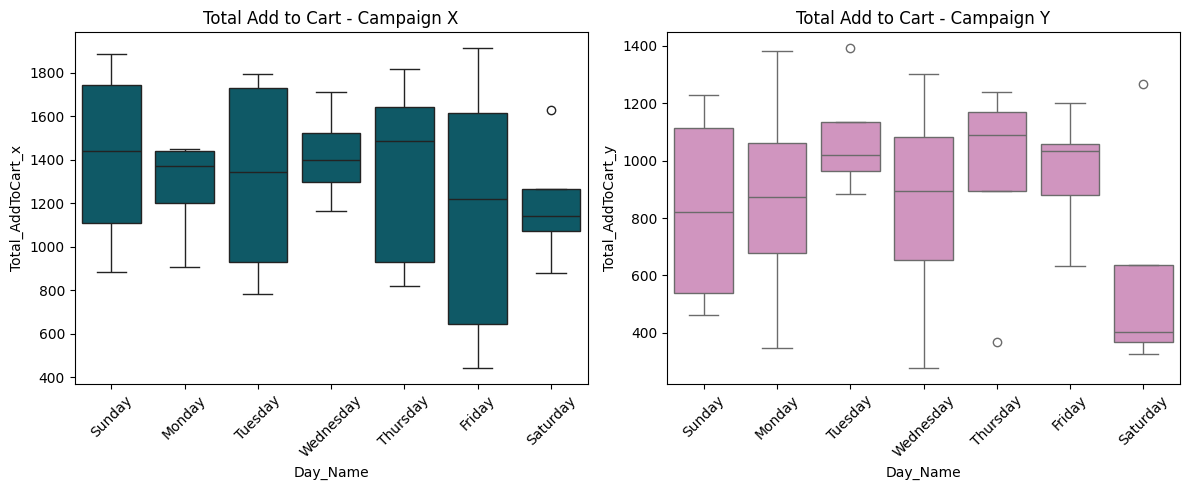

In [36]:
#In this visualization, you're comparing the "Total Add to Cart" values for Campaign X and Campaign Y across different days of the week
#X-axis: Represents the days of the week, ordered from Sunday to Saturday
#Y-axis: Represents the total "Add to Cart" values for each campaign (X and Y)

weekday_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
df_mrg["Day_Name"] = pd.Categorical(df_mrg["Day_Name"], categories=weekday_order, ordered=True)

fig, axes_2 = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

#First boxplot
sb.boxplot(data=df_mrg, x="Day_Name", y="Total_AddToCart_x", ax=axes_2[0], color="#006374", order=weekday_order)
axes_2[0].set_title("Total Add to Cart - Campaign X")
axes_2[0].set_xticks(range(len(weekday_order)))
axes_2[0].set_xticklabels(weekday_order, rotation=45) 

#Second boxplot
sb.boxplot(data=df_mrg, x="Day_Name", y="Total_AddToCart_y", ax=axes_2[1], color="#da8bc3", order=weekday_order)
axes_2[1].set_title("Total Add to Cart - Campaign Y")
axes_2[1].set_xticks(range(len(weekday_order)))
axes_2[1].set_xticklabels(weekday_order, rotation=45)

plt.tight_layout()
plt.show()


### A quick analysis:

- From the data, Campaign Y generally shows higher "Add to Cart" values than Campaign X across all days  
- This can be seen in the medians of the box plots for both campaigns, with Campaign Y consistently having higher medians for each day of the week  
For example, on Monday, Campaign Y has a median "Add to Cart" value of 1,391, while Campaign X has a median of 1,439. This could indicate that both campaigns perform similarly on certain days, but Campaign Y still performs slightly better overall on most days
- Saturday seems to be the weakest day for Campaign X, with values as low as 645, and for Campaign Y, it is 779. This could suggest that user engagement on weekends is lower compared to weekdays
- Thursday seems to be a high-performing day for both campaigns, especially for Campaign X (1,641) and Campaign Y (1,168). This indicates that mid-week campaigns are performing strongly
- Campaign X shows more variability on certain days such as Thursday and Tuesday. This suggests that on these days, there is more fluctuation in the "Add to Cart" activity, with some users showing extreme behavior (either very high or very low)
- Campaign Y generally performs better than Campaign X, especially in the middle of the week (Tuesday, Wednesday, Thursday). However, Campaign X performs better on certain days such as Monday, where Campaign X shows a higher median and less spread compared to Campaign Y  
- Both campaigns show similar patterns, with peaks on Tuesday and dips on Saturday. This could indicate a common weekly pattern in consumer behavior  

## Final Conclusions:

- The Test Group spent more on average (2563 dollars vs. 2288 dollars in the Control Group). Despite higher spend, the Test Group had fewer impressions and reach, meaning they were likely paying more per impression  
- Control Group had significantly more impressions and reach (109K impressions vs. 74K and 88K reach vs. 53K). This suggests the Test Group’s ad strategy is more expensive per user reached, possibly due to targeting a more specific audience  
- Test Group had more clicks on average (6032 vs. 5320)  
- The Test Group had slightly more searches (2418 vs. 2221), indicating that users from the test group may be more interested or intent-driven  
- Both groups had similar content views, though the Control Group was slightly higher (1943 vs. 1858). This suggests the Control Group might be better at driving curiosity but not necessarily better at conversion  
- The Control Group had a much higher add-to-cart rate (1300 vs. 881). This means users in the control group were more likely to add items to their carts after engaging with the ad. This is a critical stage in the sales funnel and suggests that the Test Group’s audience is less conversion-prone  
- Purchases were nearly identical (522 vs. 521). This suggests that despite differences in clicks and add-to-cart behavior, both groups ultimately resulted in the same number of sales  
- The Test Group spent more money to achieve the same number of purchases—which could mean a less efficient strategy
  
### Final Insights:
- The Control Group appears more efficient in reaching people and converting them into purchases  
- The Test Group is better at generating clicks and searches but struggles with conversion at later stages  
- If the goal is awareness, the Control Group wins (more impressions & reach for less money)  
- If the goal is engagement, the Test Group performs well (higher clicks and searches)  
- However, if the goal is final sales, both groups perform the same, but the Control Group does it more cost-effectively

## Suggestions for impprovement (especially for the test group):
- Refine audience segments by focusing on users with a higher intent to buy (e.g., past customers, people who added to the cart before but didn’t buy)  
- Use lookalike audiences based on past buyers instead of broad interest-based targeting  
- Analyze engagement data—which age groups, locations, or behaviors convert best